In [16]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

sp.init_printing()

def plot_function(f, x, a, b):
    plt.grid()
    x_axis = np.linspace(a, b, 100)
    p = lambda f, x, x1 : f.subs(x, x1)
    y_axis = [p(f, x, x1) for x1 in x_axis]
    plt.title('$f(x)='+sp.latex(f)+'$')
    plt.plot(x_axis, y_axis)

xj = [1, 1.5, 2]
yj = [1.2, 1.3, 2.3]

x = sp.Symbol('x')

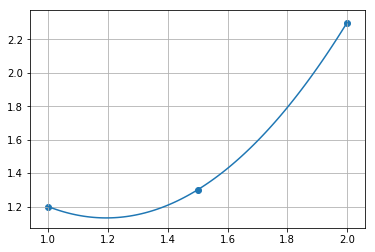

In [2]:
n = len(xj)
v = sp.Matrix(np.vstack([np.ones(n), np.array(xj), np.array(xj)**2]).T)

A = (v.T * v).inv() * (v.T * sp.Matrix(yj))

f = 3.7 - 4.3 * x + 1.8 * x**2

plt.scatter(xj, yj)
plot_function(f, x, min(xj), max(xj))

In [3]:
def regression(f0, x, x0, y0, fator_termos = None):
    v = sp.Matrix(
        [
            [
                float(f0[j].subs(x,x0[i])) 
                for j in range(len(f0))
            ] 
            for i in range(len(x0))
        ]
    )
    A = (v.T * v).inv() * (v.T * sp.Matrix(y0))
    f = 0
    for i in range(len(A)):
        if fator_termos == None:
            f += f0[i] * A[i]
        else:
            f += f0[i] * fator_termos[i](A[i])
    return f


In [4]:
x0 = [1, 1.5, 2]
y0 = [1.2, 1.3, 2.3]
f0 = [x**0, sp.cos(10*x)]

In [5]:
def ex(f0, x, x0, y0):
    f = regression(f0,x,x0,y0)

    plt.scatter(x0, y0)
    plt.title('$f(x)='+sp.latex(f)+'$')
    plot_function(f, x, min(x0), max(x0))

    plt.show()
def ex2(f0, x, x0, y0, fator, fator_terms):
    f = regression(f0,x,x0,y0, fator_terms)
    f = fator(f)

    plt.scatter(x0, y0)
    plt.title('$f(x)='+sp.latex(f)+'$')
    plot_function(f, x, min(x0), max(x0))

    plt.show()

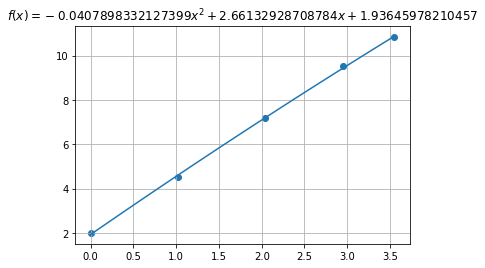

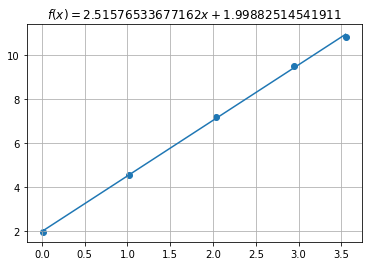

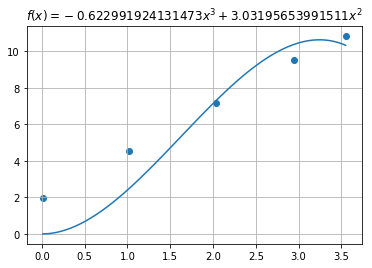

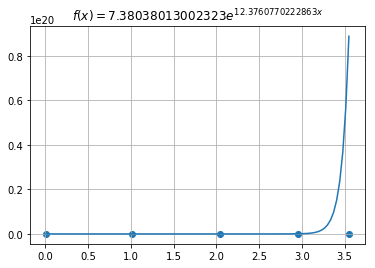

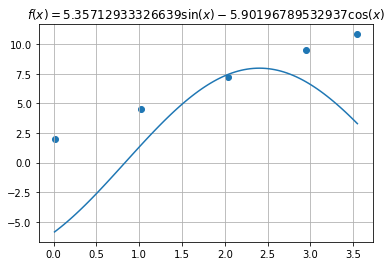

In [6]:
x0 = [0.01, 1.02, 2.04, 2.95, 3.55]
y0 = [1.99, 4.55, 7.20, 9.51, 10.82]
f0 = [x**2, x, x**0]
f1 = [x, x**0]
f2 = [x**2, x**3]
f3 = [x, x**0]
f4 = [sp.cos(x), sp.sin(x)]


ex(f0, x, x0, y0)
ex(f1, x, x0, y0)
ex(f2, x, x0, y0)
ex2(f3, x, x0, y0, lambda x: sp.exp(x), [lambda x: sp.exp(x), lambda x: x])
ex(f4, x, x0, y0)


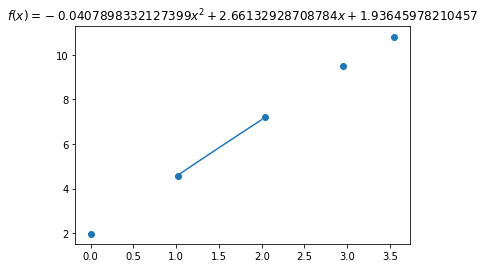

In [7]:

f = regression(f0,x,x0,y0)

plt.grid()
plt.scatter(x0, y0)
plt.title('$f(x)='+sp.latex(f)+'$')
plot_function(f, x, 1, 2)

plt.show()

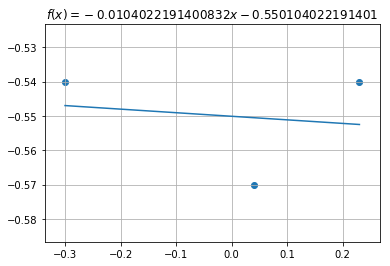

In [18]:
x0 = [0.23, -0.3, 0.04]
y0 = [-0.54, -0.54, -0.57]
x = sp.Symbol('x')
f0 = [x**0, x**1]

f = regression(f0, x, x0, y0)
plt.scatter(x0, y0)
plot_function(f, x, min(x0), max(x0))

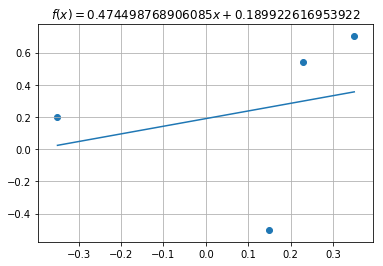

In [21]:
x0 = [-0.35, 0.15, 0.23, 0.35]
y0 = [0.2, -0.5, 0.54, 0.7]
x = sp.Symbol('x')
f0 = [x**0, x**1]

f = regression(f0, x, x0, y0)
plt.scatter(x0, y0)
plot_function(f, x, min(x0), max(x0))

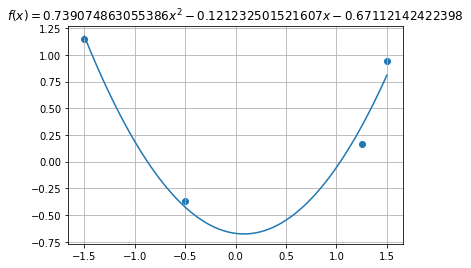

In [25]:
x0 = [-1.5, -0.5, 1.25, 1.5]
y0 = [1.15, -0.37, 0.17, 0.94]
x = sp.Symbol('x')
max_n = 2
f0 = [x**n for n in range(max_n+1)]

f = regression(f0, x, x0, y0)
plt.scatter(x0, y0)
plot_function(f, x, min(x0), max(x0))

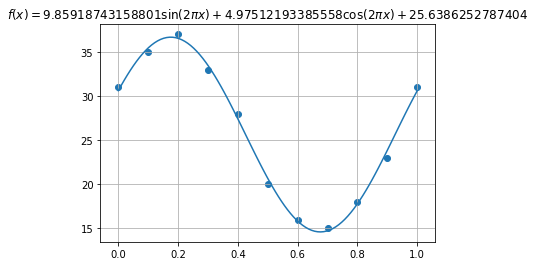

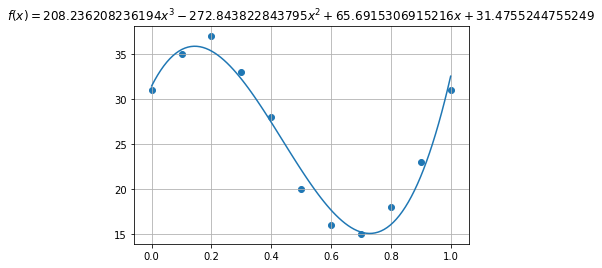

In [32]:
x0 = np.linspace(0, 1, 11)
y0 = [31, 35, 37, 33, 28, 20, 16, 15, 18, 23, 31]
x = sp.Symbol('x')
f0 = [x**0, sp.cos(2*sp.pi*x), sp.sin(2*sp.pi*x)]

f = regression(f0, x, x0, y0)
plt.scatter(x0, y0)
plot_function(f, x, min(x0), max(x0))
plt.show()

max_n = 3
f0 = [x**n for n in range(max_n+1)]
f = regression(f0, x, x0, y0)
plt.scatter(x0, y0)
plot_function(f, x, min(x0), max(x0))
plt.show()